<h1 style="text-align:center">Clase 6: Análisis en frecuencia de la respuesta a excitación sísmica</h1>
<h3 style="text-align:center">ACUS125: Aislamiento y Análisis de Vibraciones</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<p style="text-align:center">Rafael Hayde <br>
<a href="mailto:vpoblete@uach.cl">rafael@penailillo.cl</a><br><br>
<a href="https://github.com/vpobleteacustica/ACUS125-Spring-2024">https://github.com/vpobleteacustica/ACUS125-Spring-2024</a><br> 
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br>
<a href="http://www.aumilab.cl">www.aumilab.cl</a><br>

# Control de las vibraciones:

> + La rigidez $k$, el amortiguamiento $c$ y la masa $m$, cumplen roles importantes en el comportamiento de las funciones de transferencia en distintos rangos de frecuencia. Esto tiene importancia a su vez, en el control de las vibraciones.

> + Por ejemplo, la magnitud de la función de transferencia que representa el desplazamiento sobre la fuerza, llamada receptancia está dada por:

\begin{align*}
\left|\frac{X(j\omega)}{F(j\omega)}\right|&=\large \frac{1}{m}\frac{1}{\sqrt{(\omega_{0}^{2}-\omega^{2})^{2}+(2\zeta \omega\omega_{0})^{2} }}
\end{align*}

> + Análisis por regiones de frecuencia (ver por ejemplo, capítulo 2.10: https://engfac.cooper.edu/pages/tzavelis/uploads/Vibration%20Theory.pdf):

>> + Cuando $\omega << \omega_{0}:$ $\quad$ $\large\left|\frac{X(j\omega)}{F(j\omega)}\right| \longrightarrow \large\frac{1}{k}$ $\quad$ se dice que el sistema vibratorio está controlado por el resorte.

>> + Cuando $\omega = \omega_{0}:$ $\quad$ $\large\left|\frac{X(j\omega)}{F(j\omega)}\right| \longrightarrow \large \frac{1}{c\cdot \omega_{0}}$ $\quad$ se dice que el sistema vibratorio está controlado por el amortiguador.

>> + Cuando $\omega >> \omega_{0}:$ $\quad$ $\large\left|\frac{X(j\omega)}{F(j\omega)}\right| \longrightarrow \large\frac{1}{m\cdot \omega^{2}}$ $\quad$ se dice que el sistema vibratorio está controlado por la masa.

<p style="text-align:center">
	<img src="CONTROLLED.png" alt="MDOF" width=55%/></a><br>
    <strong> Figura 1: Tres condiciones de frecuencia para control de vibraciones.</strong>
</p>

> + Ver interesante animación en: https://www.acs.psu.edu/drussell/Demos/Resonance-Regions/Resonance.html

# Modelo simple de un movimiento sísmico

<p style="text-align:center">
	<img src="model.png" alt="A Mass-Spring-Damper System" width=75%/></a><br>
    <strong> Figura 1: Modelo de un movimiento sísmico de la base. </strong>
</p>

> + La excitación está en la base como se muestra en la Figura 1:

> + La masa es lo que nos interesa proteger de las vibraciones.

> + La magnitud de la fuerza de excitación será $y(t)$ y en este problema, esta magnitud está dada en términos de un desplazamiento.

> + La salida o respuesta del movimiento vibratorio de la masa está dada por $x(t)$.

> + Queremos cuantificar (conocer) la magnitud de la fuerza transmitida a la masa $m$.

> + Del diagrama de cuerpo libre, obtenemos:

\begin{align*}
m\ddot{x}(t)+c\,(\dot{x}(t)-\dot{y}(t)) + k\,(x(t)-y(t))& =0
\end{align*}

\begin{align*}
\ddot{x}(t)+2\zeta \omega_{0}\,(\dot{x}(t)-\dot{y}(t))+\omega_{0}^{2}\,(x(t)-y(t))& =0
\end{align*}

\begin{align*}
\ddot{x}(t)+2\zeta \omega_{0}\,\dot{x}(t) +\omega_{0}^{2}x(t)&= 2\zeta\omega_{0}\dot{y}(t)+\omega_{0}^{2}y(t)\quad \,\,\,{\large/}\mathscr{F}\left\{\cdot\right\}
\end{align*}

> + $\ldots$

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Define the System Parameters
m = 1.0                  # kg
k = (2.0 * np.pi)**2.    # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k / m)      # Natural Frequency (rad/s)

z = 0.25                 # Define a desired damping ratio
c = 2 * z * wn * m       # calculate the damping coeff. to create it (N/(m/s))

wd = wn*np.sqrt(1-z**2)  # Damped natural frequency (rad/s)

Definimos la función de frecuencia normalizada como:

\begin{align*}
H(\omega) & = \frac{1 + j(2\zeta\,r)}{1-r^2 + j(2\zeta\,r)}
\end{align*}

\begin{align*}
H(\omega)& = \frac{\left|X(\omega)\right|}{\left|Y(\omega)\right|}\, e^{i \phi(\omega)} = \sqrt{\frac{1 + (2\zeta\,r)^2}{(1-r^2)^2 + (2\zeta\,r)^2}}\,\, e^{i \phi(\omega)}
\end{align*}

donde
$ \quad \phi(\omega) = \tan^{-1}\left({2\zeta\Omega}\right) - \tan^{-1}\left({\frac{2\zeta\Omega}{1-\Omega^2}}\right)$

En el área de control de vibraciones, en particular, en aislamiento de las vibraciones, se conoce la función **Transmisibilidad** ($T_{r}$), dada por:

\begin{align*}
T_{r}(\omega) & = \sqrt{\frac{1 + (2\zeta\,r)^2}{(1-r^2)^2 + (2\zeta\,r)^2}}
\end{align*}

La motivación de esta **Transmisibilidad** es la siguiente:

\begin{align*}
\left|X(\omega)\right| & = T_{r}(\omega)\,\left|Y(\omega)\right|
\end{align*}

> + Cuando $T_{r}(\omega)=1$, no hay aislamiento de la masa $m$, se está transmitiendo el 100\% de la fuerza sísmica a la masa. 

\begin{align*}
\left|X(\omega)\right| & = \left|Y(\omega)\right|
\end{align*}

> + Pero, cuando $T_{r}(\omega)<1$, se interpreta que está ocurriendo **aislamiento** de la masa $m$, y solamente una parte de la fuerza sísmica original se está transmitiendo a la masa. Por ejemplo, si $T_{r}(\omega)= 0.5$  

\begin{align*}
\left|X(\omega)\right| & = 0.5\left|Y(\omega)\right|
\end{align*}


Grafiquemos la magnitud y la fase para algunos valores de factor de amortiguamiento.

In [3]:
# Set up the normalized frequency range
w = np.linspace(0,20,2000)            # Normalize Freq, 0-20 with 2000 points in-between

# Define the normalized transfer function for several different damping ratios
z = 0.0;
mag_normal_un = np.sqrt((1+(2*z*w)**2)/((1-w**2)**2+(2*z*w)**2))
phase_un = (np.arctan2(2*z*w,1) - np.arctan2((2*z*w),(1-w**2)))*180/np.pi

# Let's mask the discontinuity in the undamped phase response
# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(1-w) <= 1e-2)
phase_un[pos] = np.nan

z = 0.1;
mag_normal_0p1 = np.sqrt((1+(2*z*w)**2)/((1-w**2)**2+(2*z*w)**2))
phase_0p1 = (np.arctan2(2*z*w,1) - np.arctan2((2*z*w),(1-w**2)))*180/np.pi

z = 0.2;
mag_normal_0p2 = np.sqrt((1+(2*z*w)**2)/((1-w**2)**2+(2*z*w)**2))
phase_0p2 = (np.arctan2(2*z*w,1) - np.arctan2((2*z*w),(1-w**2)))*180/np.pi

z = 0.4;
mag_normal_0p4 = np.sqrt((1+(2*z*w)**2)/((1-w**2)**2+(2*z*w)**2))
phase_0p4 = (np.arctan2(2*z*w,1) - np.arctan2((2*z*w),(1-w**2)))*180/np.pi

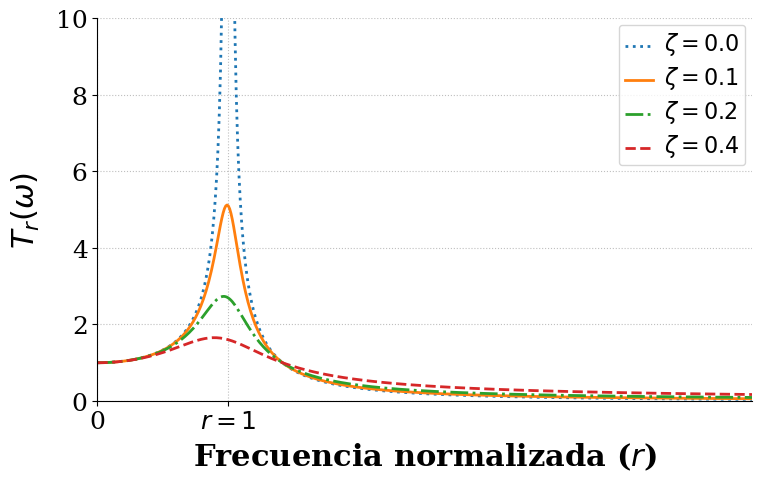

In [4]:
# Let's plot the magnitude of the frequency response

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Frecuencia normalizada ($r$)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$T_r(\omega)$',family='Serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(w,mag_normal_un,  linewidth=2, linestyle = ':',   label=r'$\zeta = 0.0$')
plt.plot(w,mag_normal_0p1, linewidth=2, linestyle = '-',   label=r'$\zeta = 0.1$')
plt.plot(w,mag_normal_0p2, linewidth=2, linestyle = '-.',  label=r'$\zeta = 0.2$')
plt.plot(w,mag_normal_0p4, linewidth=2, linestyle = '--',  label=r'$\zeta = 0.4$')

plt.xlim(0,5)
plt.ylim(0,10)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# savefig('Seismic_Freq_Resp_mag.pdf',dpi=600)

#fig.set_size_inches(9,6) # Resize the figure for better display in the notebook
plt.xticks([0,1],['0','$r = 1$'])
fig.set_size_inches(8,5) # Resize the figure for better display in the notebook

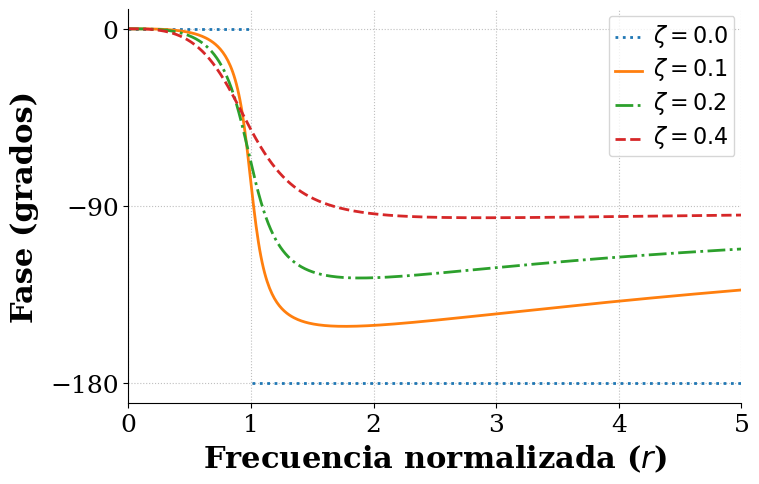

In [5]:
# Now, let's plot the Phase Frequency Response

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Frecuencia normalizada ($r$)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'Fase (grados)',family='Serif',fontsize=22,weight='bold',labelpad=8)

plt.plot(w,phase_un,  linewidth=2, linestyle = ':',  label=r'$\zeta = 0.0$')
plt.plot(w,phase_0p1, linewidth=2, linestyle = '-',  label=r'$\zeta = 0.1$')
plt.plot(w,phase_0p2, linewidth=2, linestyle = '-.', label=r'$\zeta = 0.2$')
plt.plot(w,phase_0p4, linewidth=2, linestyle = '--', label=r'$\zeta = 0.4$')

plt.xlim(0,5)
plt.ylim(-190,10)
plt.yticks([-180,-90,0])

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('Seismic_Freq_Resp_Phase.pdf',dpi=600)

fig.set_size_inches(8,5) # Resize the figure for better display in the notebook

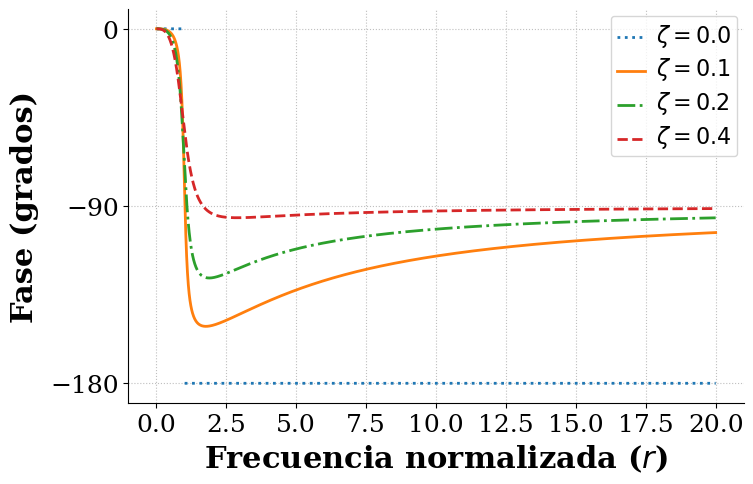

In [6]:
# Plot the Phase Frequency Response over a larger range of frequencies

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Frecuencia normalizada ($r$)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'Fase (grados)',family='Serif',fontsize=22,weight='bold',labelpad=8)

plt.plot(w,phase_un,  linewidth=2, linestyle = ':',  label=r'$\zeta = 0.0$')
plt.plot(w,phase_0p1, linewidth=2, linestyle = '-',  label=r'$\zeta = 0.1$')
plt.plot(w,phase_0p2, linewidth=2, linestyle = '-.', label=r'$\zeta = 0.2$')
plt.plot(w,phase_0p4, linewidth=2, linestyle = '--', label=r'$\zeta = 0.4$')

plt.ylim(-190,10)
plt.yticks([-180,-90,0])

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('Seismic_Freq_Resp_Phase_Extended.pdf',dpi=600)

fig.set_size_inches(8,5) # Resize the figure for better display in the notebook
#plt.xticks([0,1],['0','$r = 1$'])

# Evaluar la transmisibilidad y analizar cuán eficiente es un aislador para aislar vibraciones no deseadas.

> + Suponer que la masa es de valor 1 (kg) y la frecuencia natural de un aislador es igual a 10 (Hz).

> + Usar un factor de amortiguamiento viscoso igual a 7%.

> + Con estos dos valores, graficar la curva de TR versus frecuencia en Hz.

<p style="text-align:center">
	<img src="TR.png" alt="MDOF" width=60%/></a><br>
    <strong> Figura 1: TR vs frecuencia en Hz.</strong>
</p>

> + Calcular el valor de amplificación del aislador en resonancia debido al amortiguamiento de 7%.

> + Obtener el valor de frecuencia en Hz a partir del cual el aislador comenzará a aislar la vibración no deseada.

> + Evaluar la transmisibilidad en 30 Hz $\left({\text{TR}}_{30\,{\text{Hz}}}\right)$. Expresar este valor en %. Obtener la reducción de vibración (aislación) en 30 Hz como: $1- \left({\text{TR}}_{30\,{\text{Hz}}}\right)$. Expresar este valor en %. 

> + Qué pasa si agregamos amortiguamiento al asilador? Cambiemos el factor de amortiguamiento viscoso a 20%. Analizar los efectos de aislación y transmisibilidad. Graficar la curva de TR versus frecuencia sobre la misma figura anterior usando otro color.

> + Con un factor de amortiguamiento viscoso a 20%, calcular el valor de amplificación del aislador en resonancia.

> + Al agregar amortiguamiento al aislador, evaluar la transmisibilidad en 30 Hz y expresarla además, en %. Obtener la reducción de vibración en 30 Hz. Expresar este valor en %.

In [7]:
import numpy as np
from bokeh.plotting import figure, show

m  = 1
f0 = 10
w0 = f0*2*np.pi
k  = m*w0**2
z  = 0.07
w  = np.logspace(0,4,5000)
f  = w/(2*np.pi)
r  = w/w0
Tr = np.sqrt((1+(2*z*r)**2)/((1-r**2)**2+(2*z*r)**2))

p  = figure(title=" curva de TR versus frecuencia ", y_axis_type="log", x_axis_type="log", x_axis_label='frecuencia (Hz)', y_axis_label='Tr')
p.line(r, Tr, legend_label = f"z={z}", line_width=2)
show(p)

In [8]:
f     = 30

Tr_30 = np.sqrt((1+(2*z*(f/f0))**2)/((1-(f/f0)**2)**2 + (2*z*(f/f0))**2))
# Transmisibilidad en los 30 Hz
print(Tr_30)

# Reducción de la vibración (aislación) en 30 Hz
print(1-Tr_30)

0.1353910112844909
0.8646089887155091


Para un aislador con una frecuencia natural $f_{0}=10\,Hz$ y factor de amortiguamiento $\zeta=0.07$ la transmisibilidad en 30Hz es de 0.1354, correspondiente a un 13.54%. La aislacion en tanto es de 0.8646, es decir, reduce la vibracion inicial en un 86.46%

+ Cambiar $\zeta$ a 20%. Analizar los efectos de aislación y transmisibilidad. Graficar la curva de TR versus frecuencia sobre la misma figura anterior usando otro color.

In [9]:
z   = [0.07,0.2]
Tr2 = np.sqrt((1+(2*z[1]*r)**2)/((1-r**2)**2+(2*z[1]*r)**2))

p  = figure(title=" curva de TR versus frecuencia ", y_axis_type="log", x_axis_type="log", x_axis_label='frecuencia (Hz)', y_axis_label='Tr')
p.line(r, Tr, legend_label = f"z={z[0]}" , line_width=2)
p.line(r, Tr2, legend_label = f"z={z[1]}", line_width=2, color='red')
show(p)